# **Seaborn with Matplotlib (2)**

## **2. seaborn + matplotlib을 이용한 jointplot 보완**

+ seaborn을 matplotlib과 섞어쓰는 방법입니다.
+ 4부 중 두 번째 시간 입니다.
+ seaborn jointplot의 단점을 보완합니다.

### **2.1. seaborn jointplot**

+ seaborn의 `jointplot` 은 매력적인 기능입니다.
    + 두 변수 **각각의 분포**와 **2차원 분포**를 함께 보여줍니다.
    + 각각의 분포는 `histogram`**과** `kdeplot` 으로 표현할 수 있고
    + 2차원 분포는 `scatterplot`, `regression`, `kdeplot`, `hexbin` 등으로 표현할 수 있습니다.

+ 만약 matplotlib에서 일일이 만들어야 한다고 눈물이 앞을 가릴 일입니다.
+ seaborn에서 **단 한 줄**로 이런 그림들이 탄생합니다.

![](https://user-images.githubusercontent.com/72365693/105937145-4db5fd00-6098-11eb-9dd3-97c1d4da01b6.PNG)

### **2.2. multiple jointplot**

+ 그러나 seaborn 만으로는 여러 jointplot이 합쳐진 그림을 **표현할 수 없습니다.**
+ y축을 공유시키는 것 만으로도 훨씬 기능이 강력해질텐데요.

![](https://user-images.githubusercontent.com/72365693/105937261-8950c700-6098-11eb-9f7d-b91420a9fe08.PNG)


+ 현실적으로 가장 빠른 방법은 **파워포인트**입니다.
+ 같은 y축 범위로 그림을 여러 개 그린 후 붙이면 됩니다.

![](https://user-images.githubusercontent.com/72365693/105937387-ccab3580-6098-11eb-8828-709a655c7af1.PNG)

+ 그러나 수작업이 동반되고, 오류 가능성이 커집니다.
+ seaborn과 matplotlib의 힘을 합해서 그려봅시다.

### **2.3. matplotlib + seaborn** 

+ [지난 글]()에서 **seaborn과 matplotlib이 섞일 수 있음**을 보였습니다.
+ **matplottlib으로 틀을 만들고 여기에 seaborn을 삽입**합니다.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")  # 펭귄 데이터셋으로 시작합니다.
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


+ 가로축에 두 개의 데이터 : `bill_length_mm`, `filpper_length_mm`
+ 세로축에 두 개의 데이터 : `bill_depth_mm`를 놓아보겠습니다.

### **2.3.1. 축공간 배열 : gridspec**

+ 저는 matplotlib을 객체지향 방식으로 사용할 때 이렇게 합니다.
    + `fig, ax = plt.subplots()` 명령으로 `figure`와 `axes`를 만드는데
    + 가로세로 여러 axes를 만들 때는 `ncols`, `nrows` 인자를 사용합니다.
    + 그러나 이렇게 하면 **모든 축공간의 크기가 같아집니다.**

+ `jointplot` 은 축공간의 크기가 일정하지 않습니다.
+ **`gridspec`** 을 이용해서 비대칭 축공간을 만듭니다. 

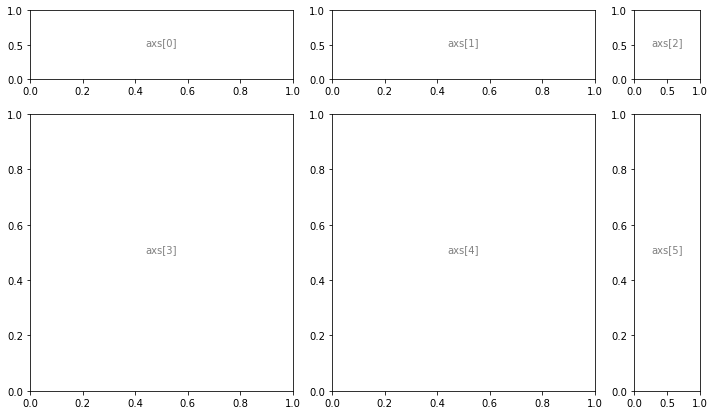

In [2]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

# widths 와 행,열 수가 맞아야한다

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])
    axs[i].text(0.5, 0.5, f"axs[{i}]", fontdict={"horizontalalignment":"center", "color":"gray"})


+ 축공간을 언래 2차원 배열입니다.
+ 하지만 이를 별로 좋아하지 않아서, `dictionary`를 사용해 1차원으로 취급합니다.
+ 개인적인 취향입니다. 꼭 따르지 않아도 좋습니다.

### **2.3.2. 첫 번째 jointplot : scatterplot + kdeplot**

+ 좌측 하단에 첫 번째 2차원 분포도를 그립니다.
+ x축 변수는 `bill_length_mm`, y축 변수는 `bill_depth_mm`로 지정합니다.
+ seaborn 명령의 `ax=` 인자를 사용해 축공간을 지정합니다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


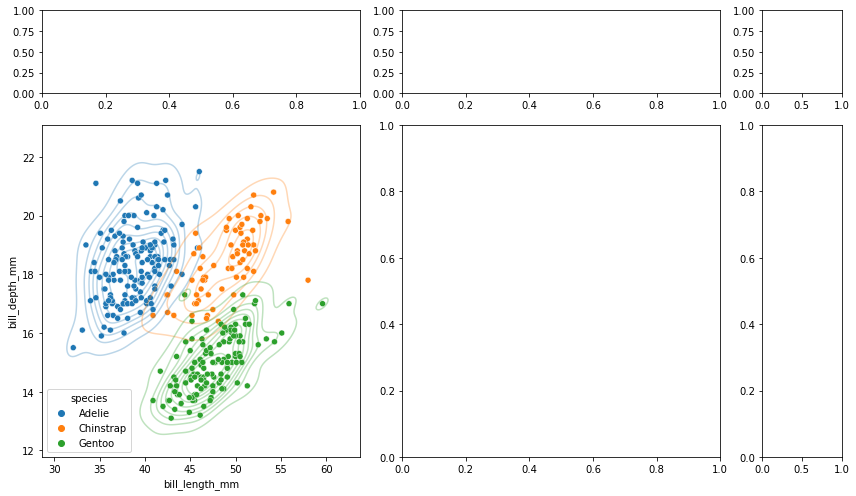

In [3]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

# 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

# 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

# 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])
# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])
fig.tight_layout()

import warnings  # 에러 메시지 off
warnings.filterwarnings(action='ignore')

### **2.3.3. 첫 번째 jointplot : 1차원 kdeplot**

+ 첫 번째 jointplot의 상단과 우측에 1차원 분포도를 그립니다.  


* 두 가지를 주의해야 합니다.

1. 중심이 되는 jointplot과 **가로세로 범위를 일치**시켜야 합니다.
2. 1차원 분포도의 **눈금과 수치는 필요없으니 제거**합니다.

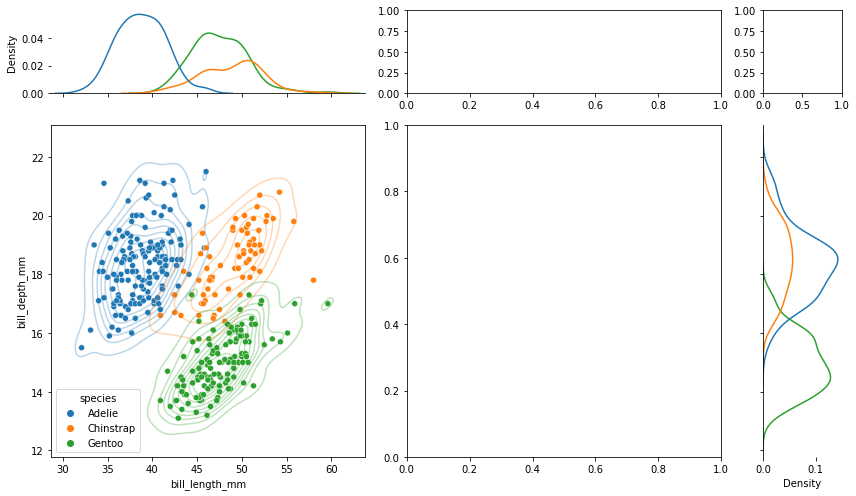

In [4]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

fig.tight_layout()

### **2.3.4. 두 번째 jointplot**

+ 같은 요령으로 두 번째 분포도 도시합니다.
+ 첫 번째 jointplot에서 x 변수만 바꿔주면 됩니다.

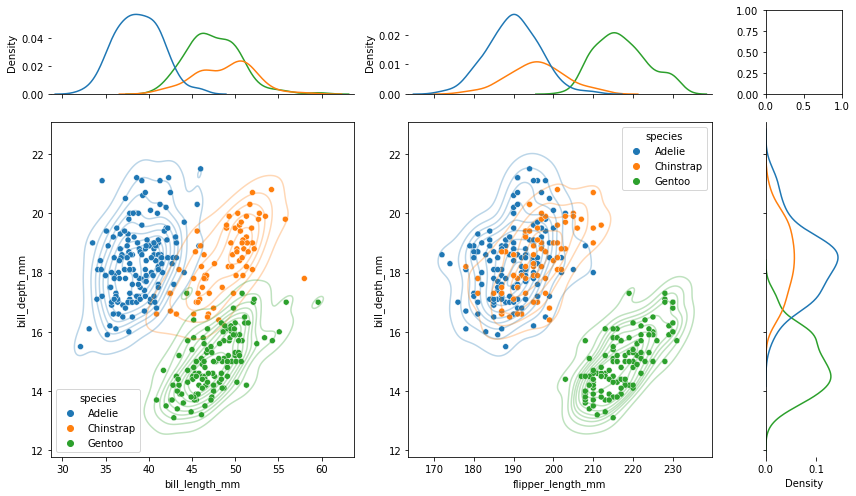

In [5]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4])

# 3.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

fig.tight_layout()

### **2.3.5 부대효과 조정 : spines, grids, 간격**

+ 데이터는 모두 올라갔으니 부대 효과를 조정합니다.
+ 불필요한 요소(ex. `spines`)는 제거하고, 애매한 요소(ex. 위치)는 `grid`로 명확히 합니다.

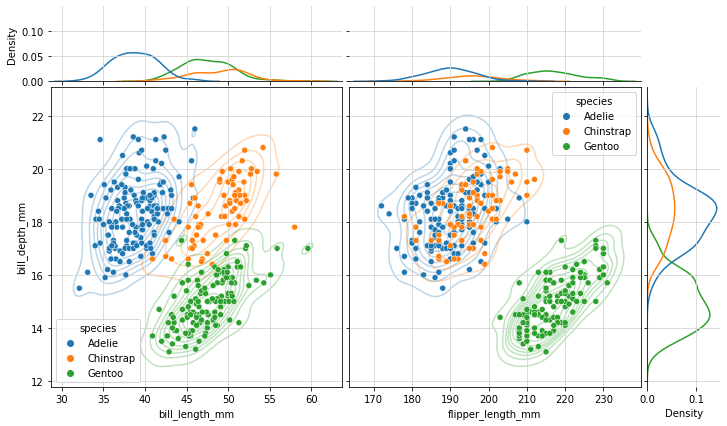

In [6]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights, 
                        wspace=0.03, hspace=0.03)  # setting spaces

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3], zorder=1)

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3], zorder=2)

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False, zorder=1)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False, zorder=1)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 4.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4], zorder=1)

# 4.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4], zorder=2)

# 4.3. histogram (flipper_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False, zorder=1)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

### 5. unnecessary elements removal
# 5.1. upper-right axes
axs[2].axis("off")

# 5.2. margin kdeplot scale unification
hist_range_max = max(axs[0].get_ylim()[-1], axs[1].get_ylim()[-1], axs[5].get_xlim()[-1])
for i in range(len(widths)-1):
    axs[i].set_ylim(0, hist_range_max)
axs[5].set_xlim(0, hist_range_max)

# 5.3. redundent labels and titles removal
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[4].set_yticklabels([])
axs[4].set_ylabel('')

# 5.4. grids
for i in range(len(heights)*len(widths)):
    axs[i].grid("on", color="lightgray", zorder=0)

fig.tight_layout()

+ 1차원 분포의 스케일도 맞춰주었습니다.
    + 그러나 꼭 필요한 작업인지는 의구심이 듭니다.
    + **'밀도'**라는 정의에 맞게 넓이를 1로 만드는 과정이 포함되어 있는데, 이로 인해 **x축 스케일이 크면 높이가 낮아지는 경향**이 있기 때문입니다.
    + 데이터의 범위에 집중하고 싶다면 스케일을 맞추지 않는 것이 나을지도 모릅니다.

### **2.3.6 마무리 작업**

+ 데이터를 표현하는 작업을 사실상 완료되었습니다.
+ 폰트의 크기, 색상 등 가독성을 높입니다.
+ 이때도 seaborn의 `set_style()`과 `set_context()`를 사용하면 편리합니다.

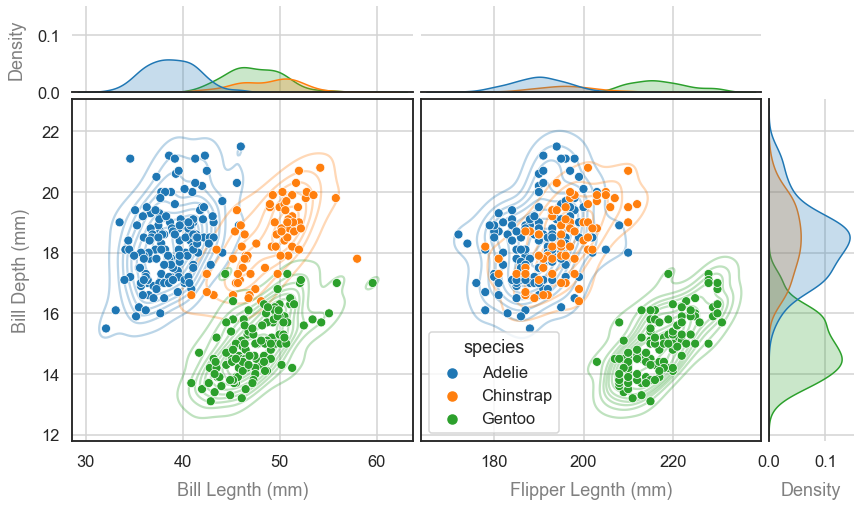

In [7]:
sns.set_style("white")
sns.set_context("talk")

fig = plt.figure(figsize=(14,8))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights, 
                        wspace=0.03, hspace=0.03)  # setting spaces

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3], zorder=1, legend=False)

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3], zorder=2, legend=False)

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False, zorder=1, fill=True)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False, zorder=1, fill=True)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 4.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4], zorder=1)

# 4.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4], zorder=2)

# 4.3. histogram (flipper_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False, zorder=1, fill=True)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

### 5. unnecessary elements removal
# 5.1. upper-right axes
axs[2].axis("off")

# 5.2. margin kdeplot scale unification
hist_range_max = max(axs[0].get_ylim()[-1], axs[1].get_ylim()[-1], axs[5].get_xlim()[-1])
for i in range(len(widths)-1):
    axs[i].set_ylim(0, hist_range_max)
axs[5].set_xlim(0, hist_range_max)

# 5.3. redundent labels and titles removal
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[4].set_yticklabels([])
axs[4].set_ylabel('')

# 5.4. grids
for i in range(len(heights)*len(widths)):
    axs[i].grid("on", color="lightgray", zorder=0)
    
# 5.5. labels
font_label = {"color":"gray"}
axs[3].set_xlabel("Bill Legnth (mm)", fontdict=font_label, labelpad=12)
axs[3].set_ylabel("Bill Depth (mm)", fontdict=font_label, labelpad=12)
axs[4].set_xlabel("Flipper Legnth (mm)", fontdict=font_label, labelpad=12)
axs[0].set_ylabel("Density", fontdict=font_label, labelpad=12)
axs[5].set_xlabel("Density", fontdict=font_label, labelpad=12)


fig.tight_layout()

+ `jointplot`의 한계인 **2중 jointplot이 구현되었습니다.**

### **2.3.7 generalize : 함수로 만들기**

+ 하는 김에, 기능을 일반화 합시다.
+ 다중 jointplot 제작 기능을 함수로 만들고,
+ x 변수의 수와 그림 크기, 1차원 분포 스케일 통일 등을 인자로 만듭니다.

In [8]:
def jointplots(xs, y, data, hue=None, height=6, ratio=5, space=0.2, xlabels=None, ylabel=None, margin_norm=False):
    """
    -------------------
    Input Parameters
    -------------------
    xs      : (list or str) feature name(s) of data
    y       : (str) feature name of data
    data    : (pandas.DataFrame)
    hue     : (str) semantic variable that is mapped to determine the color of plot elements. Semantic variable that is mapped to determine the color of plot elements.
    
    height  : (float) size of the figure
    ratio   : (float) ratio of the joint axes height to marginal axes height.
    space   : (float) space between the joint and marginal axes
    
    xlabels : (list or str) xlabels
    ylabel  : (str) ylabel
    margin_norm : (boolean) if True, kdeplots at marginal axes have same scale.
    """
    ### 1. input check
    # input type
    assert isinstance(xs, list) or isinstance(xs, str)
    if isinstance(xs, list):
        assert all([isinstance(x, str) for x in xs])
    else:
        xs = [xs]
        
    
    if xlabels != None:
        assert isinstance(xlabels, list) or isinstance(xlabels, str)
        if isinstance(xlabels, list):
            assert all([isinstance(xlabel, str) for xlabel in xlabels])
        else:
            xlabels = [xlabels]
    
    if ylabel != None:
        assert isinstance(ylabel, str)
    
    if hue != None:
        assert isinstance(hue, str)
    
    # input data
    assert all([x in data.columns for x in xs])
    assert y in data.columns
    if hue != None:
        assert hue in data.columns
    
    
    ### 2. figure
    h_margin = height / (ratio + 1)
    h_joint = height - h_margin
    
    if isinstance(xs, list):
        n_x = len(xs)
    else:
        n_x = 1
    
    widths = [h_joint] * n_x + [h_margin]
    heights = [h_margin, h_joint]
    ncols = len(widths)
    nrows = len(heights)
    
    fig = plt.figure(figsize=(sum(widths), sum(heights)))
    
    ### 3. gridspec preparation
    spec = fig.add_gridspec(ncols=ncols, nrows=nrows, 
                            width_ratios = widths, height_ratios = heights,
                            wspace=space, hspace=space
                           )
    
    ### 4. setting axes
    axs = {}
    for i in range(ncols * nrows):
        axs[i] = fig.add_subplot(spec[i//ncols, i%ncols])
    
    
    ### 5. jointplots (scatterplot + kdeplot)
    for i, x in enumerate(xs, ncols):
        if i == ncols:
            legend=True
        else:
            legend=False
        sns.kdeplot(x=x, y=y, data=data, hue=hue, alpha=0.3, ax=axs[i], zorder=2, legend=False)
        sns.scatterplot(x=x, y=y, data=data, hue=hue, alpha=0.8, ax=axs[i], zorder=3, legend=legend)
    
    
    ### 6. kdeplots at marginal axes
    axs[ncols-1].axis("off")
    
    axes_mx = list(range(ncols-1))
    axes_my = 2*ncols - 1
    
    for i, x in zip(axes_mx, xs):
        sns.kdeplot(x=x, data=data, hue=hue, fill=True, ax=axs[i], zorder=2, legend=False)
        axs[i].set_xlim(axs[i+ncols].get_xlim())
        axs[i].set_xlabel("")
        axs[i].set_xticklabels([])
        axs[i].spines["left"].set_visible(False)
        axs[i].spines["top"].set_visible(False)
        axs[i].spines["right"].set_visible(False)
    
    sns.kdeplot(y=y, data=data, hue=hue, fill=True, ax=axs[axes_my], zorder=2, legend=False)
    axs[axes_my].set_ylim(axs[ncols].get_ylim())
    axs[axes_my].set_ylabel("")
    axs[axes_my].set_yticklabels([])
    axs[axes_my].spines["bottom"].set_visible(False)
    axs[axes_my].spines["top"].set_visible(False)
    axs[axes_my].spines["right"].set_visible(False)
    
    if margin_norm == True:
        hist_range_max = max([axs[m].get_ylim()[-1] for m in axes_mx] + [axs[axes_my].get_xlim()[-1]])
        for i in axes_mx:
            axs[i].set_ylim(0, hist_range_max)
        axs[axes_my].set_xlim(0, hist_range_max)
        
        
    ### 7. unnecessary elements removal
    # 7.1. labels and ticklabels
    axes_j = list(range(ncols, 2*ncols-1))
    for i in axes_j:
        if i != ncols:
            axs[i].set_ylabel("")
            axs[i].set_yticklabels([])
    
    # 7.2. marginal axes
    for i in axes_mx:
        if i != 0:
            axs[i].set_ylabel("")
        
        axs[i].grid("on", color="lightgray", zorder=0)
        axs[i].set_yticklabels([])
        
        yticks = axs[i].get_yticks()
        ylim = axs[i].get_ylim()
        for ytick in yticks:
            if 0 < ytick < ylim[-1]:
                axs[i].text(axs[i].get_xlim()[0], ytick, str(ytick), 
                            fontdict={"verticalalignment":"center"})
        
    axs[axes_my].grid("on", color="lightgray", zorder=0)
    axs[axes_my].set_xticklabels([])
    axes_my_xticks = axs[axes_my].get_xticks()
    axes_my_xlim = axs[axes_my].get_xlim()
    for xtick in axes_my_xticks:
        if 0 < xtick < axes_my_xlim[-1]:
            axs[axes_my].text(xtick, axs[axes_my].get_ylim()[0], str(xtick), 
                              rotation=270, fontdict={"horizontalalignment":"center"})
    
    # 7.3. labels
    font_label = {"color": "gray", "fontsize":"large"}
    labelpad = 12
    for i, x in zip(axes_j, xlabels):
        axs[i].set_xlabel(x, fontdict=font_label, labelpad=labelpad)
        if i == ncols:
            axs[i].set_ylabel(ylabel, fontdict=font_label, labelpad=labelpad)
    
    axs[0].set_ylabel("Density", fontdict=font_label, labelpad=labelpad)
    axs[2*ncols-1].set_xlabel("Density", fontdict=font_label, labelpad=labelpad)
    
    fig.align_ylabels([axs[0], axs[ncols]])
    fig.align_xlabels([axs[x] for x in range(ncols, 2*ncols)])
    plt.tight_layout()
    
    return fig, axs

+ **x인자의 수가 바뀌어도** jointplot이 안정적으로 그려집니다.
+ 1차원 분포도 **표현 방식을 바꾸어** 전보다 깔끔해졌습니다.

(<Figure size 1536x576 with 8 Axes>,
 {0: <AxesSubplot:ylabel='Density'>,
  1: <AxesSubplot:>,
  2: <AxesSubplot:>,
  3: <AxesSubplot:>,
  4: <AxesSubplot:xlabel='Bill Length (mm)', ylabel='Body Mass (g)'>,
  5: <AxesSubplot:xlabel='Bill Depth (mm)'>,
  6: <AxesSubplot:xlabel='Flipper Length (mm)'>,
  7: <AxesSubplot:xlabel='Density'>})

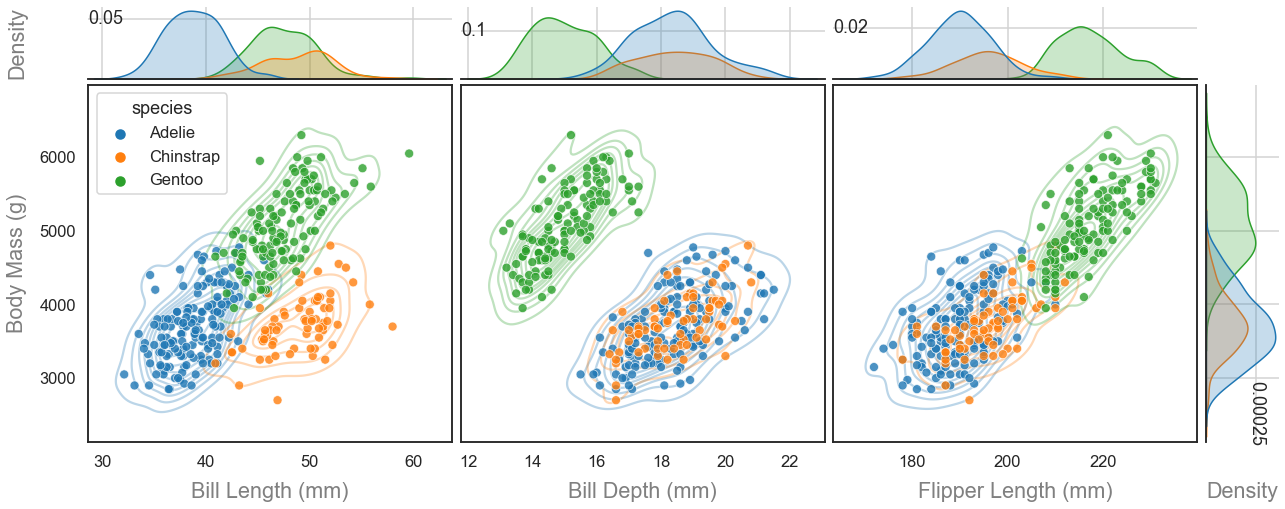

In [9]:
jointplots(["bill_length_mm", "bill_depth_mm", "flipper_length_mm"], "body_mass_g", penguins, hue="species", 
            height=8, ratio=5, space=0.03, 
            xlabels=["Bill Length (mm)", "Bill Depth (mm)", "Flipper Length (mm)"], ylabel="Body Mass (g)")

### **2.4 결론**

+ seaborn의 jointplot을 가져다 쓰는데 그치지 않았습니다.
+ **matplotlib의 객체지향 방식을 이용해 seaborn의 한계를 벗어날 수 있었습니다.**

+ 본 예제에서는 `scatterplot0`과 2차원 `kdeplot`만 결합했습니다.
+ 그러나 이 외에도 seaborn과 matplotlib이 제공하는 거의 모든 기능을 결합할 수 있습니다.
+ 메뉴얼의 한계에 얽매이지 말고 상상력을 동원해 보시면 어떨까요.

[출처](https://jehyunlee.github.io/2020/10/03/Python-DS-35-seaborn_matplotlib2/)